In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Goal & Steps:
1. Predicting Car Prices:
   - Task: Build a regression model to predict the price (y=price) of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing `linear regression` and `KNN` algorithm.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models and Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

In [6]:
df.shape

(202, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

# Data Preprocessing

In [8]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 14
Integer variables: 0
Float variables: 6


# Exploratory Data Analysis

<Axes: >

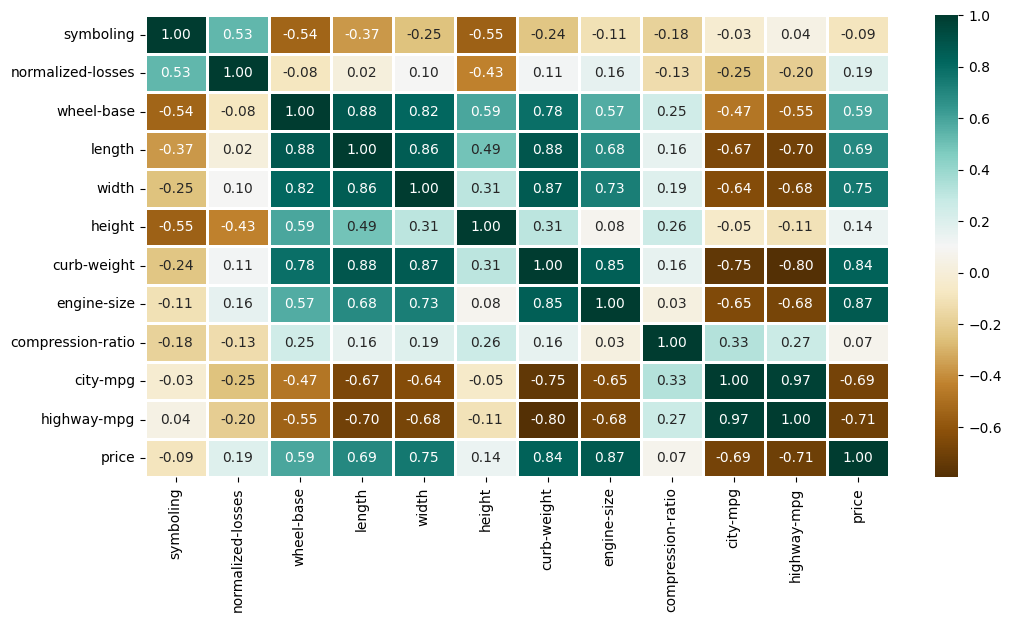

In [11]:
# Select only numerical features for correlation analysis
numerical_dataset = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

## <font color=red>To analyze the different categorical features.</font>

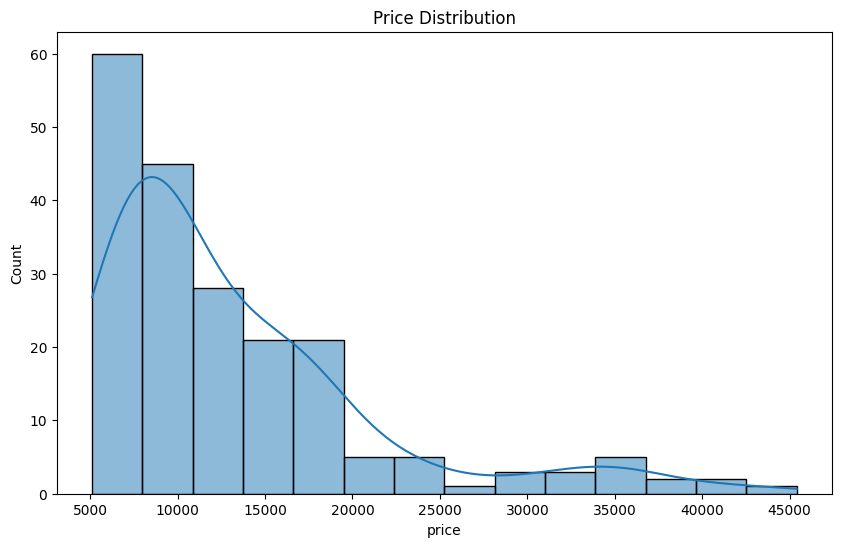

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

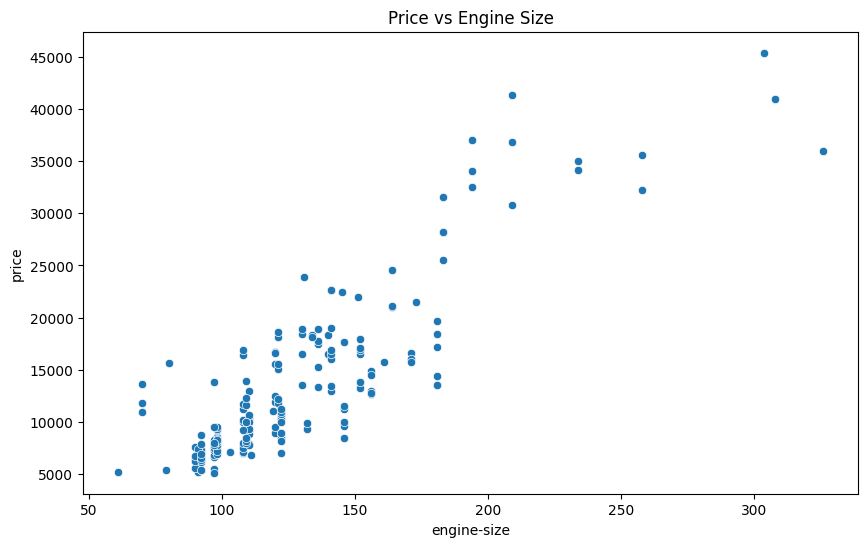

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='engine-size', y='price')
plt.title('Price vs Engine Size')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5896\3134010060.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


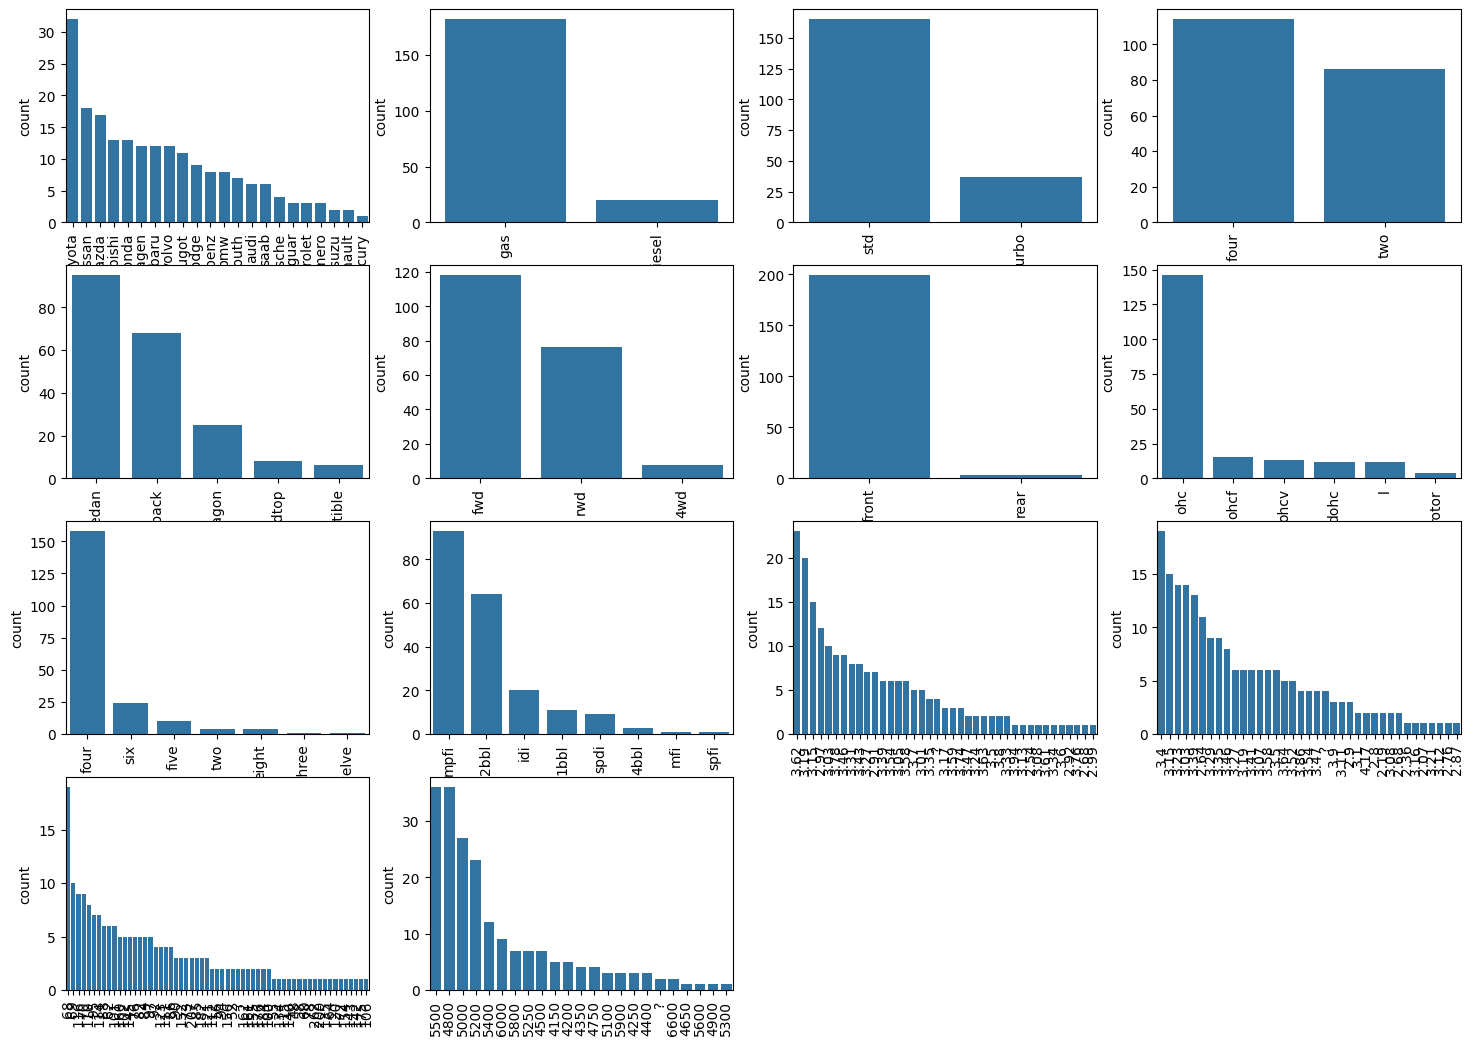

In [14]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = df[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [15]:
df['price'] = df['price'].fillna(
  df['price'].mean()) 

In [16]:
new_df = df.dropna()

In [17]:
new_df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# OneHotEncoder – For Label categorical features

In [18]:
from sklearn.preprocessing import OneHotEncoder

s = (new_df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm']
No. of. categorical features:  14


In [27]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_df[object_cols]))
OH_cols.index = new_df.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_df.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

# Splitting Dataset into Training and Testing

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['price'], axis=1)
Y = df_final['price']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

# Model and Accuracy

### SVM – Support vector Machine

In [29]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.2962867811887248


### Random Forest Regression

In [30]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

0.10048948740469245

### Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.12720193463913487


### KNN Regression

In [37]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, Y_train)

KNeighborsRegressor()

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
y_knn_reg_pred = knn_reg.predict(X_valid)
knn_reg_mse = mean_squared_error(Y_valid, y_knn_reg_pred)
knn_reg_mse

3101332.860606061

In [43]:
knn_reg_r2 = r2_score(Y_valid, y_knn_reg_pred)
knn_reg_r2

0.9058241236536813